In [1]:
import pandas as pd
import numpy as np

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


## Splitting & Using RF+LGB - Stacking


In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from lightgbm import LGBMClassifier 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# LightGBM
lgb_classifier = LGBMClassifier()  

lgb_classifier.fit(X_train, y_train)

# Stacking
base_models = [
    ('random_forest', random_forest),
    ('lgb_classifier', lgb_classifier)  
]

stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42))

# Timing Comparison
start_time = time.time()
random_forest.fit(X_train, y_train)
end_time = time.time()
training_time_rf = end_time - start_time

start_time = time.time()
lgb_classifier.fit(X_train, y_train)  # Fit LGBMClassifier
end_time = time.time()
training_time_lgb = end_time - start_time

start_time = time.time()
stacking_model.fit(X_train, y_train)
end_time = time.time()
training_time_stacking = end_time - start_time

print(f"Random Forest Training time: {training_time_rf:.2f} seconds")
print(f"LightGBM Training time: {training_time_lgb:.2f} seconds")
print(f"Stacking Training time: {training_time_stacking:.2f} seconds")

# Evaluate on Test Set
accuracy_rf = random_forest.score(X_test, y_test)
accuracy_lgb = lgb_classifier.score(X_test, y_test)
accuracy_stacking = stacking_model.score(X_test, y_test)

print(f"Random Forest Test Accuracy: {accuracy_rf:.2f}")
print(f"LightGBM Test Accuracy: {accuracy_lgb:.2f}")
print(f"Stacking Test Accuracy: {accuracy_stacking:.2f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start training from score -0.251483
[LightGBM] [Info] Start training from score -1.995966
[LightGBM] [Info] Start training from score -2.447951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train se

## Using Evaluation Metrics

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start training from score -0.251483
[LightGBM] [Info] Start training from score -1.995966
[LightGBM] [Info] Start training from score -2.447951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start tra

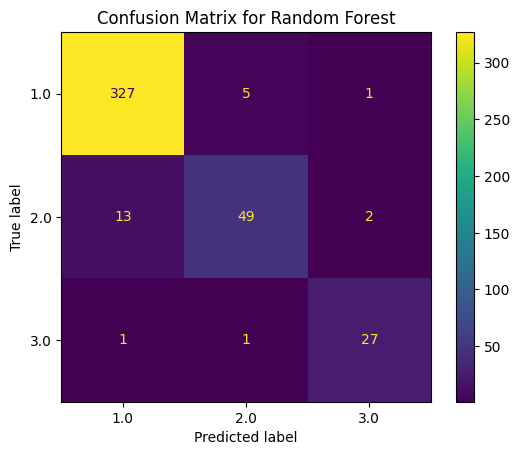

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.89      0.77      0.82        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.92      0.89      0.90       426
weighted avg       0.94      0.95      0.94       426


Metrics for LightGBM:
Accuracy =  95.77464788732394 %
Precision =  0.9509005076470398
Recall =  0.9189221549135342
F1-score =  0.9343167979561423


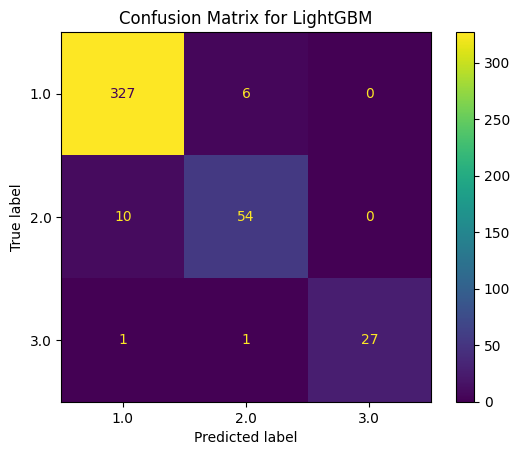

Classification Report
              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       333
         2.0       0.89      0.84      0.86        64
         3.0       1.00      0.93      0.96        29

    accuracy                           0.96       426
   macro avg       0.95      0.92      0.93       426
weighted avg       0.96      0.96      0.96       426


Metrics for Stacking:
Accuracy =  94.60093896713614 %
Precision =  0.9206739706739707
Recall =  0.9139171499085292
F1-score =  0.9171815634483934


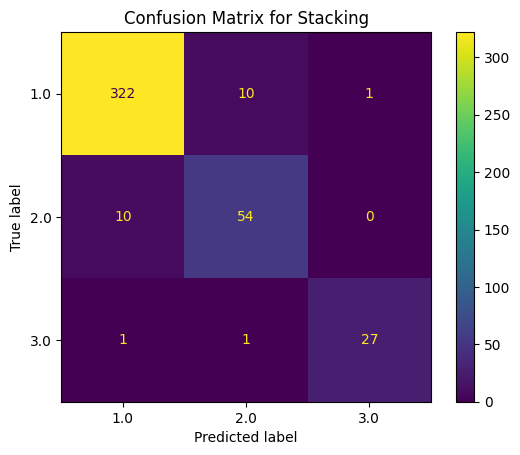

Classification Report
              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       333
         2.0       0.83      0.84      0.84        64
         3.0       0.96      0.93      0.95        29

    accuracy                           0.95       426
   macro avg       0.92      0.91      0.92       426
weighted avg       0.95      0.95      0.95       426



In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from lightgbm import LGBMClassifier  # Import LGBMClassifier


# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# LightGBM
lgb_classifier = LGBMClassifier()  # Use LGBMClassifier
lgb_classifier.fit(X_train, y_train)
y_pred_lgb = lgb_classifier.predict(X_test)

# Stacking
base_models = [
    ('random_forest', random_forest),
    ('lgb_classifier', lgb_classifier)  # Replace decision_tree with lgb_classifier
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42))
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

# Evaluation Metrics
models = {
    'Random Forest': y_pred_rf,
    'LightGBM': y_pred_lgb,
    'Stacking': y_pred_stacking
}

for model_name, y_pred in models.items():
    print(f"\nMetrics for {model_name}:")
    print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
    print("Precision = ", precision_score(y_test, y_pred, average='macro'))
    print("Recall = ", recall_score(y_test, y_pred, average='macro'))
    print("F1-score = ", f1_score(y_test, y_pred, average='macro'))

    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_train))
    disp.plot()
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    print("Classification Report")
    print(classification_report(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start training from score -0.251483
[LightGBM] [Info] Start training from score -1.995966
[LightGBM] [Info] Start training from score -2.447951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start tra

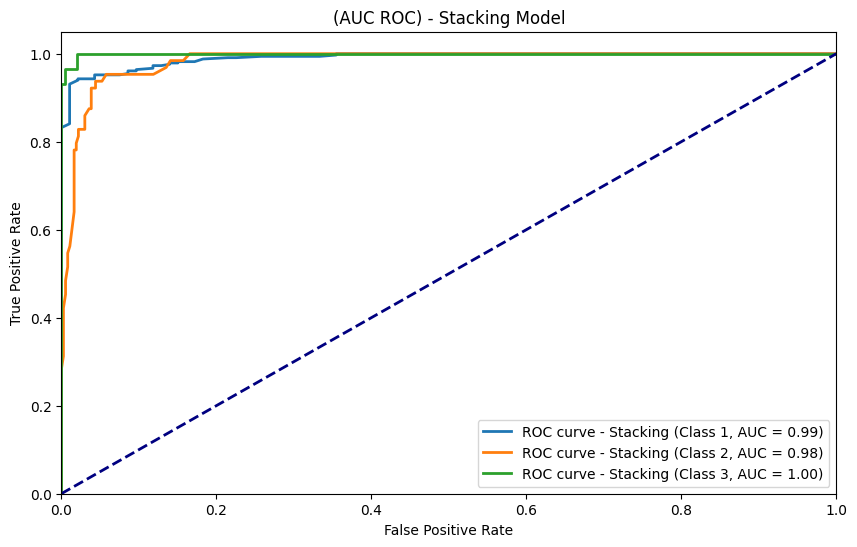

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier  # Import LGBMClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# LightGBM
lgb_classifier = LGBMClassifier()  # Use LGBMClassifier
lgb_classifier.fit(X_train, y_train)

# Stacking
base_models = [
    ('random_forest', random_forest),
    ('lgb_classifier', lgb_classifier)  # Replace decision_tree with lgb_classifier
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42))
stacking_model.fit(X_train, y_train)
y_scores_stacking = stacking_model.predict_proba(X_test)

n_classes = len(np.unique(y))
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

plt.figure(figsize=(10, 6))

for i in range(n_classes):
    fpr_stacking, tpr_stacking, _ = roc_curve(y_test_binarized[:, i], y_scores_stacking[:, i])
    roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

    plt.plot(fpr_stacking, tpr_stacking, lw=2, label=f'ROC curve - Stacking (Class {i + 1}, AUC = {roc_auc_stacking:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Stacking Model')
plt.legend(loc="lower right")
plt.show()


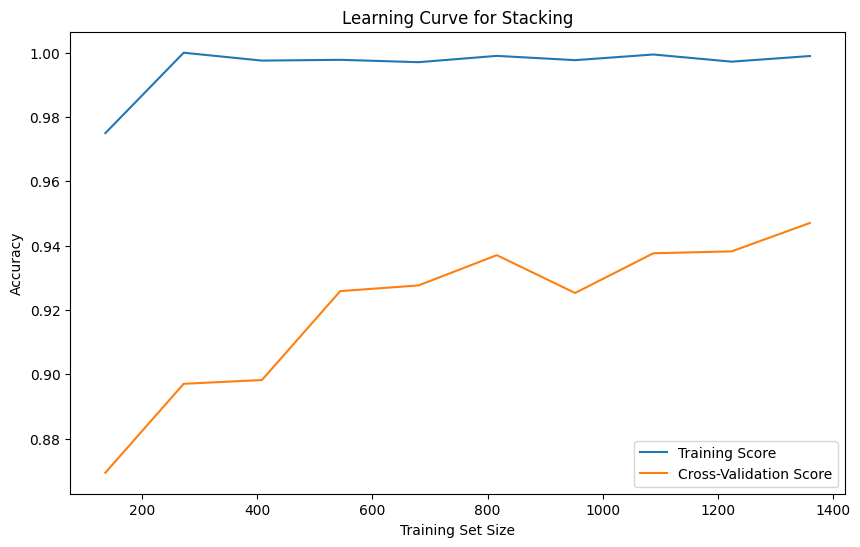

In [8]:


models = {
    'Stacking': y_pred_stacking
}
for model_name, y_pred in models.items():

    train_sizes, train_scores, test_scores = learning_curve(
        stacking_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {model_name}')
    plt.legend()
    plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start training from score -0.251483
[LightGBM] [Info] Start training from score -1.995966
[LightGBM] [Info] Start training from score -2.447951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start tra

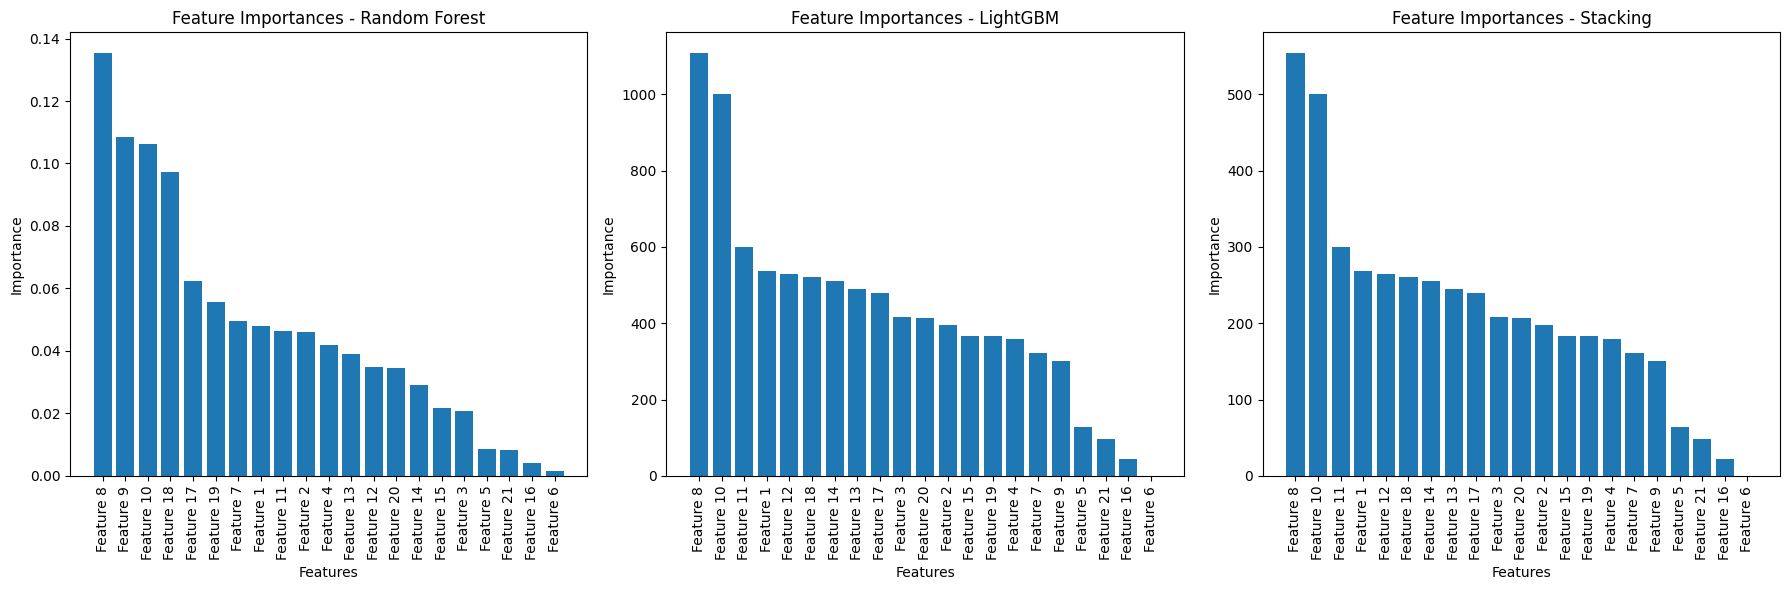

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from lightgbm import LGBMClassifier  # Import LGBMClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train and y_train are defined

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
feature_importances_rf = random_forest.feature_importances_

# LightGBM
lgb_classifier = LGBMClassifier()  # Use LGBMClassifier
lgb_classifier.fit(X_train, y_train)
feature_importances_lgb = lgb_classifier.feature_importances_

# Stacking
base_models = [
    ('random_forest', random_forest),
    ('lgb_classifier', lgb_classifier)  # Replace decision_tree with lgb_classifier
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42))
stacking_model.fit(X_train, y_train)
feature_importances_stacking = np.mean([estimator.feature_importances_ for estimator in stacking_model.estimators_], axis=0)

# Plotting
feature_names = [f"Feature {i+1}" for i in range(len(feature_importances_rf))]
sorted_idx_rf = feature_importances_rf.argsort()[::-1]

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.bar(range(len(feature_importances_rf)), feature_importances_rf[sorted_idx_rf], align="center")
plt.xticks(range(len(feature_importances_rf)), [feature_names[i] for i in sorted_idx_rf], rotation='vertical')
plt.title("Feature Importances - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")

feature_names = [f"Feature {i+1}" for i in range(len(feature_importances_lgb))]
sorted_idx_lgb = feature_importances_lgb.argsort()[::-1]

plt.subplot(1, 3, 2)
plt.bar(range(len(feature_importances_lgb)), feature_importances_lgb[sorted_idx_lgb], align="center")
plt.xticks(range(len(feature_importances_lgb)), [feature_names[i] for i in sorted_idx_lgb], rotation='vertical')
plt.title("Feature Importances - LightGBM")
plt.xlabel("Features")
plt.ylabel("Importance")

feature_names = [f"Feature {i+1}" for i in range(len(feature_importances_stacking))]
sorted_idx_stacking = feature_importances_stacking.argsort()[::-1]

plt.subplot(1, 3, 3)
plt.bar(range(len(feature_importances_stacking)), feature_importances_stacking[sorted_idx_stacking], align="center")
plt.xticks(range(len(feature_importances_stacking)), [feature_names[i] for i in sorted_idx_stacking], rotation='vertical')
plt.title("Feature Importances - Stacking")
plt.xlabel("Features")
plt.ylabel("Importance")

plt.tight_layout()
plt.show()


In [10]:
top_k_features_indices = sorted_idx_stacking[:10]
print("Indices of Important Features:", top_k_features_indices)

X_selected = X.iloc[:, top_k_features_indices]

Indices of Important Features: [ 7  9 10  0 11 17 13 12 16  2]


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


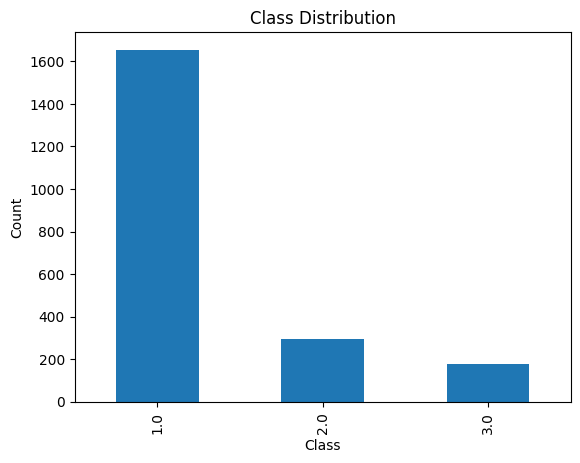

In [11]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)


print("Feature names during training:", X_resampled.columns)
print("Feature names in the test set:", X_test.columns)
X_test_aligned = X_test[X_resampled.columns]

Feature names during training: Index(['abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'baseline value',
       'histogram_width', 'histogram_mean', 'histogram_max', 'histogram_min',
       'histogram_mode', 'fetal_movement'],
      dtype='object')
Feature names in the test set: Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')


Class Distribution:
fetal_health
2.0    1655
1.0    1655
3.0    1655
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


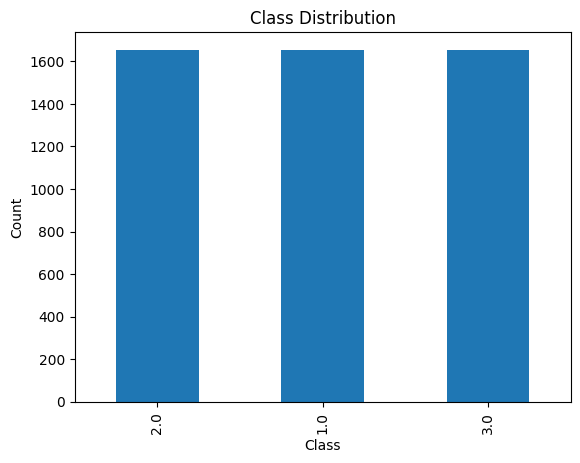

In [13]:


class_distribution = y_resampled.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using RF+LGB - Stacking

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from lightgbm import LGBMClassifier  # Import LGBMClassifier
import numpy as np

# Random Forest
random_forest_after = RandomForestClassifier()
random_forest_after.fit(X_resampled, y_resampled)

# LightGBM
lgb_classifier_after = LGBMClassifier(random_state=42)
lgb_classifier_after.fit(X_resampled, y_resampled)

# Stacking
base_models = [
    ('random_forest', random_forest_after),
    ('lgb_classifier', lgb_classifier_after)
]

# Using LightGBM as the meta-estimator
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LGBMClassifier(random_state=42))

# Stratified Cross-Validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in stratified_cv.split(X_resampled, y_resampled):
    X_train_fold, X_val_fold = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train_fold, y_val_fold = y_resampled[train_index], y_resampled[test_index]

    # Training base models
    random_forest_after.fit(X_train_fold, y_train_fold)
    lgb_classifier_after.fit(X_train_fold, y_train_fold)

    # Stacking
    stacking_model.fit(X_train_fold, y_train_fold)

    # Predictions on validation set
    y_pred_val_rf = random_forest_after.predict(X_val_fold)
    y_pred_val_lgb = lgb_classifier_after.predict(X_val_fold)
    y_pred_val_stack = stacking_model.predict(X_val_fold)

    # Evaluate the models on validation set
    accuracy_rf = accuracy_score(y_val_fold, y_pred_val_rf)
    accuracy_lgb = accuracy_score(y_val_fold, y_pred_val_lgb)
    accuracy_stack = accuracy_score(y_val_fold, y_pred_val_stack)

    print(f"Random Forest Accuracy: {accuracy_rf}")
    print(f"LightGBM Accuracy: {accuracy_lgb}")
    print(f"Stacking Accuracy: {accuracy_stack}")

# Predictions on the full training set
y_pred_full_rf = random_forest_after.predict(X_resampled)
y_pred_full_lgb = lgb_classifier_after.predict(X_resampled)
y_pred_full_stack = stacking_model.predict(X_resampled)

# Predictions on the test set
y_pred_test_rf = random_forest_after.predict(X_test_aligned)
y_pred_test_lgb = lgb_classifier_after.predict(X_test_aligned)
y_pred_test_stack = stacking_model.predict(X_test_aligned)

y_test_converted = y_test - 1


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 4965, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of data points in the train set: 3972, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.0

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2548
[LightGBM] [Info] Number of data points in the train set: 3972, number of used features: 10
[LightGBM] [Info] Start training from score -1.115368
[LightGBM] [Info] Start training from score -1.088094
[LightGBM] [Info] Start training from score -1.092588
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2547
[LightGBM] [Info] Number of data points in the train set: 3177, number of used features: 10
[LightGBM] [Info] Start training from score -1.115756
[LightGBM] [Info] Start training from score -1.0

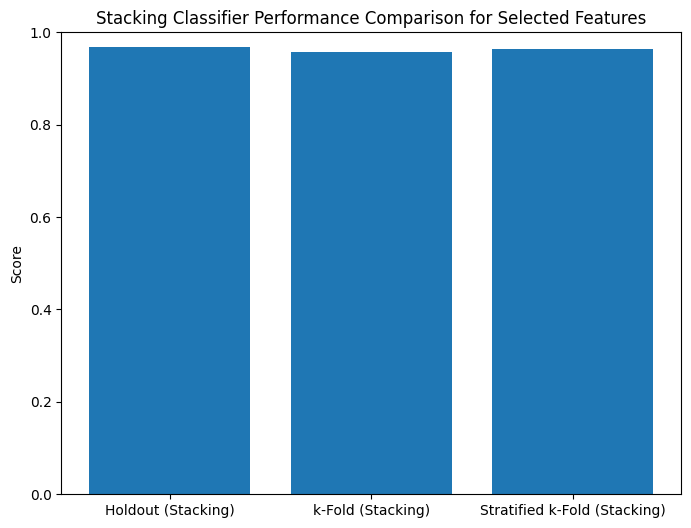

In [15]:
cv_scores_holdout_stack = []
cv_scores_kfold_stack = []
cv_scores_stratified_kfold_stack = []

# Holdout
X_train, X_holdout, y_train, y_holdout = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
stacking_model.fit(X_train, y_train)
score_holdout = stacking_model.score(X_holdout, y_holdout)
cv_scores_holdout_stack.append(score_holdout)
print(f'Holdout Score (Stacking): {score_holdout}')

# k-Fold
kf_stack = KFold(n_splits=4, shuffle=True, random_state=42)
scores_kfold_stack = cross_val_score(stacking_model, X_resampled, y_resampled, cv=kf_stack, scoring='accuracy')
cv_scores_kfold_stack.append(scores_kfold_stack.mean())
print(f'k-Fold CV (Stacking): {scores_kfold_stack.mean()}')

# Stratified k-Fold
skf_stack = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
scores_stratified_kfold_stack = cross_val_score(stacking_model, X_resampled, y_resampled, cv=skf_stack, scoring='accuracy')
cv_scores_stratified_kfold_stack.append(scores_stratified_kfold_stack.mean())
print(f'Stratified k-Fold CV (Stacking): {scores_stratified_kfold_stack.mean()}')

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(['Holdout (Stacking)', 'k-Fold (Stacking)', 'Stratified k-Fold (Stacking)'],
        [cv_scores_holdout_stack[0], cv_scores_kfold_stack[0], cv_scores_stratified_kfold_stack[0]])
plt.title(f'Stacking Classifier Performance Comparison for Selected Features')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.show()


## Using Evaluation Metrics

<Figure size 800x600 with 0 Axes>

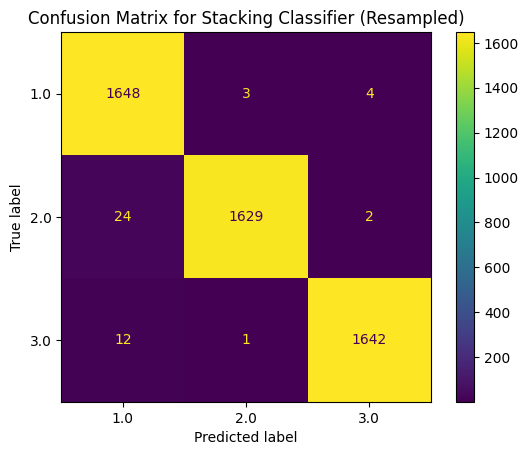

Accuracy (Stacking - Resampled): 99.07351460221551 %
Precision (macro, Stacking - Resampled): 0.9908440238687785
Recall (macro, Stacking - Resampled): 0.9907351460221551
F1-score (macro, Stacking - Resampled): 0.9907484862797425
Classification Report (Stacking - Resampled):
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99      1655
         2.0       1.00      0.98      0.99      1655
         3.0       1.00      0.99      0.99      1655

    accuracy                           0.99      4965
   macro avg       0.99      0.99      0.99      4965
weighted avg       0.99      0.99      0.99      4965



<Figure size 800x600 with 0 Axes>

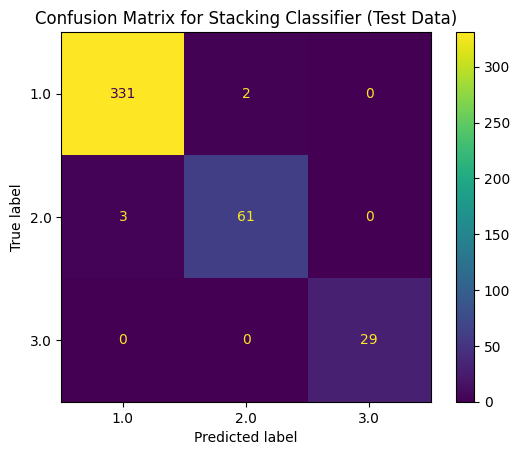

Accuracy (Stacking - Test): 98.82629107981221 %
Precision (macro, Stacking - Test): 0.9864239774419415
Recall (macro, Stacking - Test): 0.9823729979979979
F1-score (macro, Stacking - Test): 0.9843778897952599
Classification Report (Stacking - Test):
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       333
         2.0       0.97      0.95      0.96        64
         3.0       1.00      1.00      1.00        29

    accuracy                           0.99       426
   macro avg       0.99      0.98      0.98       426
weighted avg       0.99      0.99      0.99       426



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluation metrics for Stacking Classifier on resampled data
accuracy_stacking_resampled = accuracy_score(y_resampled, y_pred_full_stack)
precision_stacking_resampled = precision_score(y_resampled, y_pred_full_stack, average='macro')
recall_stacking_resampled = recall_score(y_resampled, y_pred_full_stack, average='macro')
f1_stacking_resampled = f1_score(y_resampled, y_pred_full_stack, average='macro')

conf_matrix_stacking_resampled = confusion_matrix(y_resampled, y_pred_full_stack)
class_report_stacking_resampled = classification_report(y_resampled, y_pred_full_stack)

# Plotting Confusion Matrix for Stacking Classifier on resampled data
plt.figure(figsize=(8, 6))
disp_stack_resampled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_stacking_resampled, display_labels=np.unique(y))
disp_stack_resampled.plot()
plt.title('Confusion Matrix for Stacking Classifier (Resampled)')
plt.show()

print("Accuracy (Stacking - Resampled):", accuracy_stacking_resampled * 100, "%")
print("Precision (macro, Stacking - Resampled):", precision_stacking_resampled)
print("Recall (macro, Stacking - Resampled):", recall_stacking_resampled)
print("F1-score (macro, Stacking - Resampled):", f1_stacking_resampled)
print("Classification Report (Stacking - Resampled):")
print(class_report_stacking_resampled)

# Evaluation metrics for Stacking Classifier on test data
accuracy_stacking_test = accuracy_score(y_test, y_pred_test_stack)
precision_stacking_test = precision_score(y_test, y_pred_test_stack, average='macro')
recall_stacking_test = recall_score(y_test, y_pred_test_stack, average='macro')
f1_stacking_test = f1_score(y_test, y_pred_test_stack, average='macro')

conf_matrix_stacking_test = confusion_matrix(y_test, y_pred_test_stack)
class_report_stacking_test = classification_report(y_test, y_pred_test_stack)

# Plotting Confusion Matrix for Stacking Classifier on test data
plt.figure(figsize=(8, 6))
disp_stack_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_stacking_test, display_labels=np.unique(y))
disp_stack_test.plot()
plt.title('Confusion Matrix for Stacking Classifier (Test Data)')
plt.show()

print("Accuracy (Stacking - Test):", accuracy_stacking_test * 100, "%")
print("Precision (macro, Stacking - Test):", precision_stacking_test)
print("Recall (macro, Stacking - Test):", recall_stacking_test)
print("F1-score (macro, Stacking - Test):", f1_stacking_test)
print("Classification Report (Stacking - Test):")
print(class_report_stacking_test)


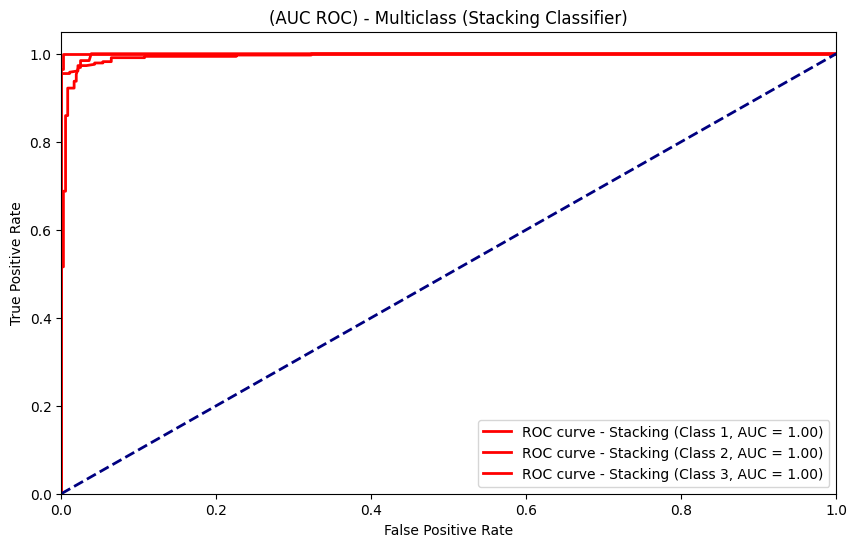

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_test_binarized = label_binarize(y_test, classes=np.unique(y))

y_scores_stacking = stacking_model.predict_proba(X_test_aligned)

plt.figure(figsize=(10, 6))

n_classes = len(np.unique(y))

colors = ['b', 'g', 'r']

# Plotting ROC curves for Stacking Classifier
for i in range(n_classes):
    fpr_stacking, tpr_stacking, _ = roc_curve(y_test_binarized[:, i], y_scores_stacking[:, i])
    roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

    plt.plot(fpr_stacking, tpr_stacking, color='r', lw=2, label=f'ROC curve - Stacking (Class {i + 1}, AUC = {roc_auc_stacking:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass (Stacking Classifier)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve



models = {
    'Stacking': y_pred_test_stack
}
for model_name, y_pred in models.items():

    train_sizes, train_scores, test_scores = learning_curve(
        stacking_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {model_name}')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42))
stacking_model.fit(X_resampled, y_resampled)

# Feature Importances for Stacking Classifier
feature_importances_stack = stacking_model.final_estimator_.feature_importances_
feature_names_stack = [f"Feature {i+1}" for i in range(len(feature_importances_stack))]
sorted_idx_stack = feature_importances_stack.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances_stack)), feature_importances_stack[sorted_idx_stack], align="center")
plt.xticks(range(len(feature_importances_stack)), [feature_names_stack[i] for i in sorted_idx_stack], rotation='vertical')
plt.title("Feature Importances - Stacking Classifier")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
